# ORCA12

In [16]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean

In [ ]:
from dask.distributed import Client, LocalCluster, wait

In [ ]:
cluster = LocalCluster(n_workers=4, threads_per_worker=2, memory_limit=16e9,
                       silence_logs=50)
client = Client(address=cluster)

In [ ]:
client

## Read mesh

In [17]:
coord_file = '/scratch/projects/shk00018/ORCA12/coordinates.nc'
ds_coord = xr.open_dataset(coord_file, decode_times=False)
e1t = ds_coord['e1t'][0,:,:]
e2t = ds_coord['e2t'][0,:,:]

## Bathymetry

In [3]:
bathy1_file = '/scratch/projects/shk00018/ORCA12/bathymetry_new.nc'
bathy2_file = '/scratch/projects/shk00018/ORCA12/eORCA12_bathymetry_v2.4.nc'
ds_b1 = xr.open_dataset(bathy1_file)
ds_b2 = xr.open_dataset(bathy2_file)
bathy1 = ds_b1['Bathymetry']
bathy2 = ds_b2['Bathymetry']

Text(0.5, 1.0, 'eORCA12')

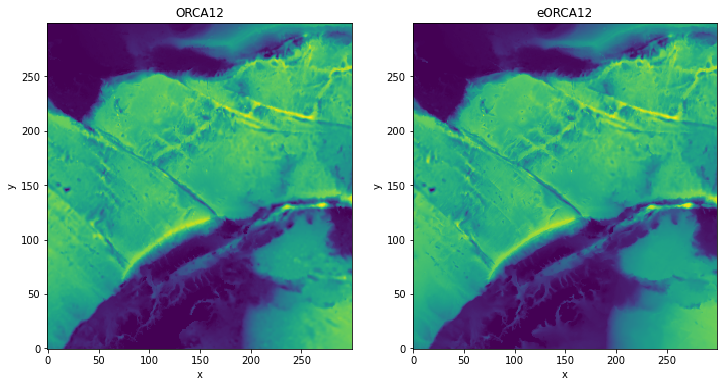

In [14]:
fig, ax1 = plt.subplots(1,2,figsize=(12,6))
i0,i1,j0,j1 = 2600,2900,450,750
bathy1[:,:][j0:j1,i0:i1].plot(ax=ax1[0],vmin=add_colorbar=False)
bathy2[547:,:][j0:j1,i0:i1].plot(ax=ax1[1],add_colorbar=False)
ax1[0].set_title('ORCA12')
ax1[1].set_title('eORCA12')

## Read data

In [18]:
#expnames = ['FOCI_BJK006','FOCI_BJK007','FOCI_BJK008','FOCI_BJK009','FOCI_BJK010']
expnames = ['FOCI_BJK011','FOCI_BJK012','FOCI_BJK013','FOCI_BJK014','FOCI_BJK015','FOCI_BJK016']
times = [slice('1950-01-01','1950-01-05'), 
         slice('1950-01-06','1950-01-10'),
         slice('1950-01-11','1950-01-15'),
         slice('1950-01-16','1950-01-20'),
         slice('1950-01-21','1950-01-31'),
         slice('1950-02-01','1950-03-31')]

In [19]:
t_1d_all = []
u_1d_all = []
v_1d_all = []
i_1d_all = []

for i,exp in enumerate(expnames):
    ddir = '/scratch/usr/shkjocke/esm-experiments/%s/outdata/nemo/' % (exp,)
    tfiles = '%s/%s_1d_*_grid_T.nc' % (ddir,exp)
    print(tfiles)
    t_1d = xr.open_mfdataset(tfiles,combine='by_coords')
    
    ufiles = '%s/%s_1d_*_grid_U.nc' % (ddir,exp)
    u_1d = xr.open_mfdataset(ufiles,combine='by_coords')
    
    vfiles = '%s/%s_1d_*_grid_V.nc' % (ddir,exp)
    v_1d = xr.open_mfdataset(vfiles,combine='by_coords')
    
    ifiles = '%s/%s_1d_*_icemod.nc' % (ddir,exp)
    i_1d = xr.open_mfdataset(ifiles,combine='by_coords')

    t_1d_all.append(t_1d)
    u_1d_all.append(u_1d)
    v_1d_all.append(v_1d)
    i_1d_all.append(i_1d)

/scratch/usr/shkjocke/esm-experiments/FOCI_BJK011/outdata/nemo//FOCI_BJK011_1d_*_grid_T.nc
/scratch/usr/shkjocke/esm-experiments/FOCI_BJK012/outdata/nemo//FOCI_BJK012_1d_*_grid_T.nc
/scratch/usr/shkjocke/esm-experiments/FOCI_BJK013/outdata/nemo//FOCI_BJK013_1d_*_grid_T.nc
/scratch/usr/shkjocke/esm-experiments/FOCI_BJK014/outdata/nemo//FOCI_BJK014_1d_*_grid_T.nc
/scratch/usr/shkjocke/esm-experiments/FOCI_BJK015/outdata/nemo//FOCI_BJK015_1d_*_grid_T.nc
/scratch/usr/shkjocke/esm-experiments/FOCI_BJK016/outdata/nemo//FOCI_BJK016_1d_*_grid_T.nc


In [20]:
t_1d

<xarray.Dataset>
Dimensions:               (y: 3059, x: 4322, deptht: 75, time_counter: 59, axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(3059, 4322), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(3059, 4322), meta=np.ndarray>
  * deptht                (deptht) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(28,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 1950-02-01T12:00:00 ....
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/18)
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(28, 75, 2), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(28, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(28, 2), meta=np.ndarray>
    toce                  (time_counter, deptht, y, x) float32 dask.array<chunksize=(28, 75, 3059, 4322), meta=np.ndarray>
    soce                  (time_counter, deptht, y, x) float32 dask.array<chunksize=(28, 75, 3059, 4322), meta=np.ndarray>
    mldr10_1              (time_counter, y, x) float32 dask.array<chunksize=(28, 3059, 4322), meta=np.ndarray>
    ...                    ...
    qsr                   (time_counter, y, x) float32 dask.array<chunksize=(28, 3059, 4322), meta=np.ndarray>
    qt                    (time_counter, y, x) float32 dask.array<chunksize=(28, 3059, 4322), meta=np.ndarray>
    qns_cal               (time_counter, y, x) float32 dask.array<chunksize=(28, 3059, 4322), meta=np.ndarray>
    sst                   (time_counter, y, x) float32 dask.array<chunksize=(28, 3059, 4322), meta=np.ndarray>
    sss                   (time_counter, y, x) float32 dask.array<chunksize=(28, 3059, 4322), meta=np.ndarray>
    ssh                   (time_counter, y, x) float32 dask.array<chunksize=(28, 3059, 4322), meta=np.ndarray>
Attributes:
    name:         FOCI_BJK016_1d_19500201_19500228_grid_T
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.6
    timeStamp:    2022-Jun-30 06:54:59 GMT
    uuid:         93d8747a-84fa-40b5-a114-1e35089f78fb

## Show land processors

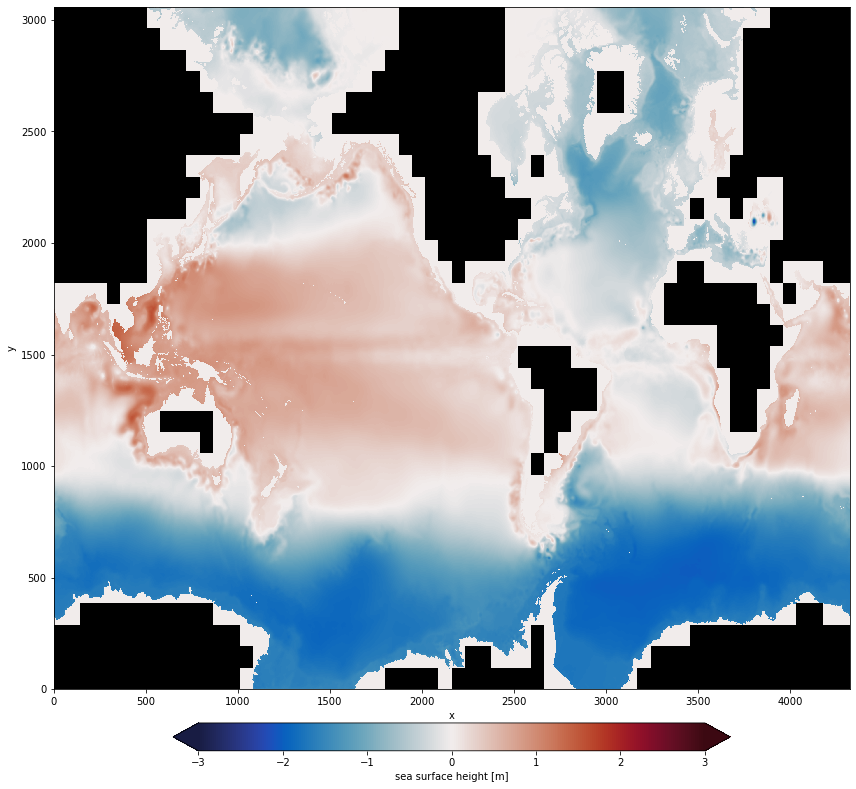

In [19]:
fig,ax=plt.subplots(1,1,figsize=(12,12))
ax.set_facecolor('black')
cbar_kwargs={'orientation':'horizontal','shrink':0.7,'pad':0.04}
t_1d['ssh'][-1,:,:].plot(ax=ax,
                         cmap=cmocean.cm.balance,vmin=-3,vmax=3,
                         cbar_kwargs=cbar_kwargs,extend='both',
                         rasterized=True)
ax.set_title('')
fig.tight_layout()
fig.savefig('ssh_elpin.pdf',format='pdf')

## Amazon

Strong runoff from Amazon can lead to numerical instabilities. 

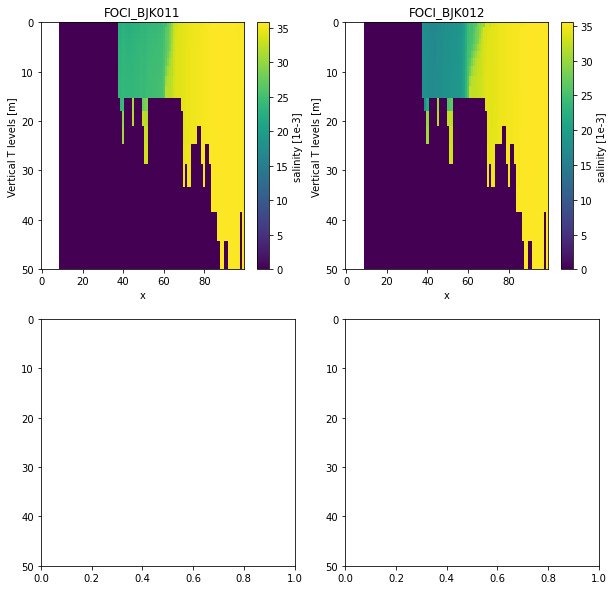

In [11]:
fig1, axs1 = plt.subplots(2,2, figsize=(10,10))
ax1 = axs1.flat

for i,(exp,ds) in enumerate( zip(expnames, t_1d_all) ):
    ds['soce'][-1,:,1500,2800:2900].plot(ax=ax1[i])
    ax1[i].set_title(exp)
    
for ax in ax1:
    ax.set_ylim([0,50])
    ax.invert_yaxis()

fig1.savefig('orca12_amazon_salt.pdf',format='pdf')

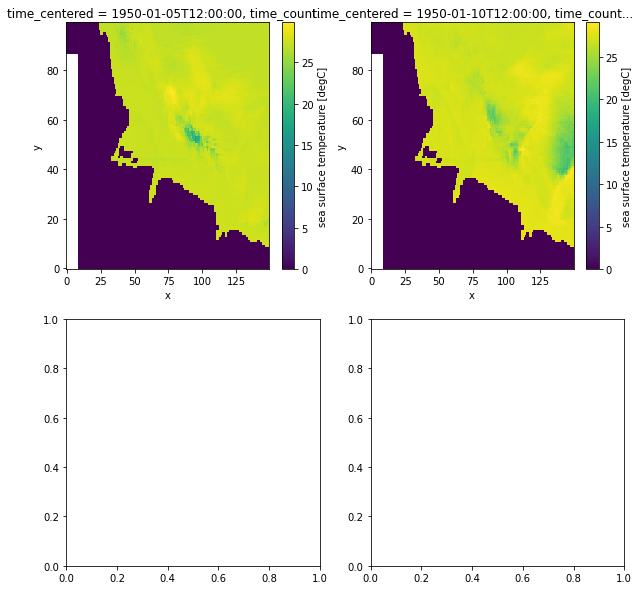

In [12]:
fig1, axs1 = plt.subplots(2,2, figsize=(10,10))
ax1 = axs1.flat

for i,(exp,ds) in enumerate( zip(expnames, t_1d_all) ):
    ds['sst'][-1,1450:1550,2800:2950].plot(ax=ax1[i])

## Gulf Stream

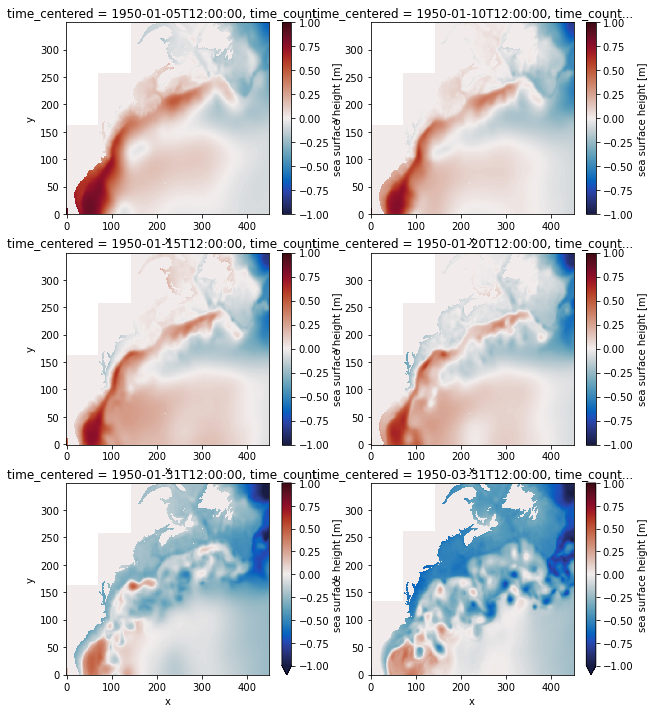

In [21]:
fig1, axs1 = plt.subplots(3,2, figsize=(10,12))
ax1 = axs1.flat

for i,(exp,ds) in enumerate( zip(expnames, t_1d_all) ):
    ssh = ds['ssh'][-1,1850:2200,2450:2900]
    ssh.plot(ax=ax1[i],
             vmin=-1,vmax=1,cmap=cmocean.cm.balance)

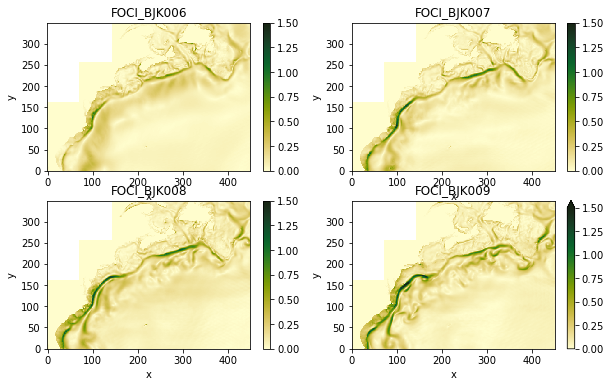

In [58]:
fig1, axs1 = plt.subplots(2,2, figsize=(10,6))
ax1 = axs1.flat

for i,(exp,dsu,dsv) in enumerate( zip(expnames, u_1d_all, v_1d_all) ):
    u = dsu['uoce'][-1,0,1850:2200,2450:2900]
    v = dsv['voce'][-1,0,1850:2200,2450:2900]
    uv = (u**2 + v**2)**(1./2)
    
    uv.plot(ax=ax1[i],
            vmin=0,vmax=1.5,cmap=cmocean.cm.speed)
    
    ax1[i].set_title(exp)
    
fig1.savefig('orca12_gulfstream_ke.pdf',format='pdf')

## Ice

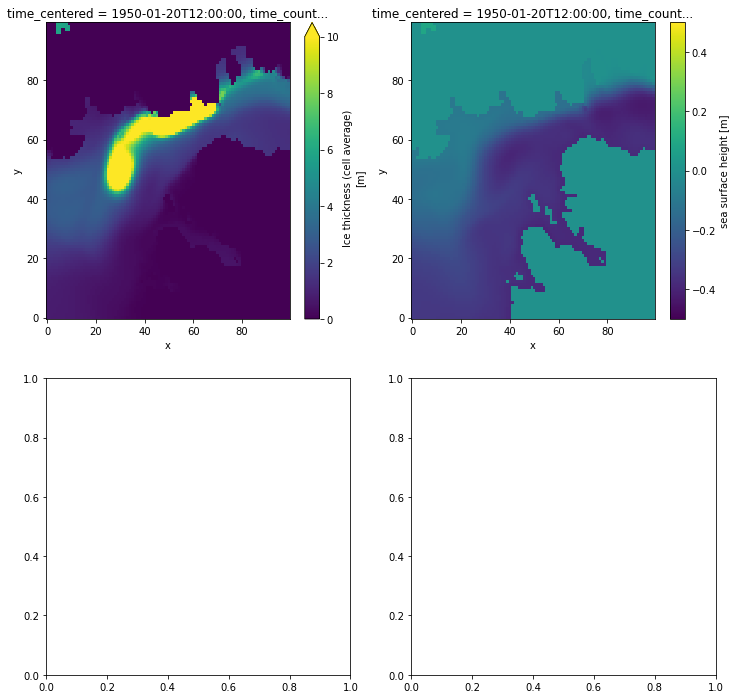

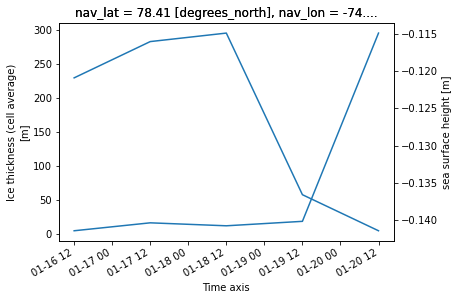

In [15]:
fig1, axs1 = plt.subplots(2,2,figsize=(12,12))
ax1 = axs1.flat

#icefrac = i_1d_all[-1]['ileadfra']
icethk = i_1d_all[3]['iicethic']
ssh = t_1d_all[3]['ssh']

icethk[-1,2800:2900,2850:2950].plot(ax=ax1[0],vmin=0,vmax=10)
ssh[-1,2800:2900,2850:2950].plot(ax=ax1[1],vmin=-0.5,vmax=0.5)

fig2, ax2 = plt.subplots(1,1)
ax22 = ax2.twinx()
icethk[:,2870,2910].plot(ax=ax2)
ssh[:,2870,2910].plot(ax=ax22)

## EKE

In [22]:
ke_all = []

for i,(exp,dsu,dsv) in enumerate( zip(expnames, u_1d_all, v_1d_all) ):
    
    u = dsu['uoce'][:,0,:,:]
    v = dsv['voce'][:,0,:,:]
    ke = (u.where(u != 0)**2 + v.where(v != 0)**2).compute()
    
    dxdy = e1t.where( u[0,:,:] != 0) * e2t.where( v[0,:,:] != 0)
    ke_sum = (ke * dxdy).sum(('x','y')) / dxdy.sum(('x','y'))
    
    ke_all.append(ke_sum.compute())

MemoryError: Unable to allocate 115. GiB for an array with shape (31, 75, 3059, 4322) and data type float32

In [ ]:
ke[-1,:,:].plot()

In [ ]:
fig1, ax1 = plt.subplots(1,1)

for i,(exp,ke) in enumerate( zip(expnames, ke_all) ):
    
    (ke/2).plot(ax=ax1,label=exp)
    
ax1.legend()
ax1.set_ylim([0,6e-2])
ax1.set_ylabel('KE [m2/s2]')
ax1.set_title('Global-mean surface KE')
fig1.savefig('orca12_ke_surf.pdf',format='pdf')

In [11]:
eke_all = []

for i,(exp,dsu,dsv) in enumerate( zip(expnames, u_1d_all, v_1d_all) ):
    
    print(exp)
    u = dsu['uoce'][:,0,:,:]
    v = dsv['voce'][:,0,:,:]
    
    print('Mean')
    um = u.rolling(x=60,center=True).mean().rolling(y=60,center=True).mean()
    vm = v.rolling(x=60,center=True).mean().rolling(y=60,center=True).mean()
    
    ue = u - um
    ve = v - vm
    
    print('EKE')
    eke = (ue.where(ue != 0)**2 + ve.where(ve != 0)**2).compute()
    
    print('Sum')
    dxdy = e1t.where( ue[0,:,:] != 0) * e2t.where( ve[0,:,:] != 0)
    eke_sum = (eke * dxdy).sum(('x','y')) / dxdy.sum(('x','y'))
    
    eke_all.append(eke_sum.compute())

FOCI_BJK006
Mean
EKE
Sum
FOCI_BJK007
Mean
EKE
Sum
FOCI_BJK008
Mean
EKE
Sum
FOCI_BJK009
Mean
EKE
Sum
FOCI_BJK010
Mean
EKE
Sum


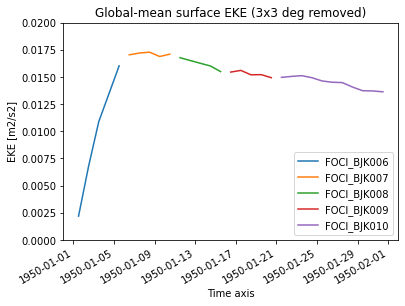

In [14]:
fig1, ax1 = plt.subplots(1,1)

for i,(exp,eke) in enumerate( zip(expnames, eke_all) ):
    
    (eke/2).plot(ax=ax1,label=exp)
    
ax1.legend()
ax1.set_ylim([0,2e-2])
ax1.set_ylabel('EKE [m2/s2]')
ax1.set_title('Global-mean surface EKE (3x3 deg removed)')
fig1.savefig('orca12_eke_surf.pdf',format='pdf')

## Umax

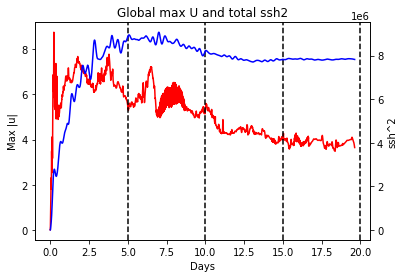

In [6]:
files = []
files.append('/scratch/usr/shkjocke/esm-experiments/FOCI_BJK011/run_19500101-19500105/work/solver.stat')
files.append('/scratch/usr/shkjocke/esm-experiments/FOCI_BJK012/run_19500106-19500110/work/solver.stat')
files.append('/scratch/usr/shkjocke/esm-experiments/FOCI_BJK013/run_19500111-19500115/work/solver.stat')
files.append('/scratch/usr/shkjocke/esm-experiments/FOCI_BJK014/run_19500116-19500120/work/solver.stat')

dts = [60, 120, 200, 300]
t0s = [0, 60*7200, 60*7200+120*3600, 60*7200+120*3600+200*2160]

fig, ax = plt.subplots(1,1)
ax2 = ax.twinx()

for j,file in enumerate(files):
    umax = []
    ssh2 = []
    f = open(file,'r')
    lines = f.readlines()
    
    for line in lines:
        data = line.split()
        ssh2.append( float(data[4]) )
        umax.append( float(data[6]) )

    f.close()
    
    # time array
    t = (t0s[j] + np.arange(0,len(umax)) * dts[j]) / (24.*60.*60.)

    ax.plot(t,umax,'-r')
    ax2.plot(t,ssh2,'-b')

ax.set_xlabel('Days')
ax.set_ylabel('Max |u|')
ax2.set_ylabel('ssh^2')
ax.set_title('Global max U and total ssh2')
ax.axvline(x=5,linestyle='dashed',c='k')
ax.axvline(x=10,linestyle='dashed',c='k')
ax.axvline(x=15,linestyle='dashed',c='k')
ax.axvline(x=20,linestyle='dashed',c='k')
fig.savefig('umax_ssh2.pdf',format='pdf')